In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

output_aCM.csv		output_amons_SOAP.csv	output_SLATM.csv
output_amons_aCM.csv	output_CM_global.csv	output_SLATM_global.csv
output_amons_FCHL.csv	output_FCHL.csv		output_SOAP.csv
output_amons_SLATM.csv	output_FCHL_global.csv	output_SPAHM_global.csv


In [4]:
slatm_out = pd.read_csv("../out/output_CM_global.csv", index_col=0)

In [5]:
slatm_out

,SolN,Fragments,ObjValNoPen,ObjValWithPen
0,1,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
1,2,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
2,3,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
3,4,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
4,5,"['frag_02_c00001', 'frag_16_c00001']",16189.235114,16189.235114
...,...,...,...,...
995,996,"['frag_01_c00001', 'frag_09_c00001', 'frag_11_...",50540.887222,60540.887222
996,997,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",40575.033421,60575.033421
997,998,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",40575.033421,60575.033421
998,999,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",40575.033421,60575.033421


In [6]:
from ast import literal_eval 

In [7]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [8]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(slatm_out["Sorted Fragments"]))

168

In [10]:
# excess is missing Hs - to fix 

In [11]:
import qml

In [12]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [13]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [14]:
import qml

In [15]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../amons-qm9/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    energy = float(energy)
    return energy

In [16]:
def get_reaction_energy(fragment_list):
    qm9_energy = -487.817450280942 # Ha
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy
    return rxn_energy

In [17]:
slatm_out["energies / Ha"] = slatm_out.apply(lambda x: get_reaction_energy(x["Fragments"]),
                                                     axis=1)

In [18]:
slatm_out["energies / kcal/mol"] = slatm_out["energies / Ha"] * 627.5

In [19]:
slatm_out.iloc[0:30]

,SolN,Fragments,ObjValNoPen,ObjValWithPen,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]",13.592657,8529.392097
1,2,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]",13.592657,8529.392097
2,3,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]",13.592657,8529.392097
3,4,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]",13.592657,8529.392097
4,5,"[frag_02_c00001, frag_16_c00001]",16189.235114,16189.235114,"[frag_02_c00001, frag_16_c00001]",34.688955,21767.319001
5,6,"[frag_02_c00001, frag_16_c00001]",16189.235114,16189.235114,"[frag_02_c00001, frag_16_c00001]",34.688955,21767.319001
6,7,"[frag_02_c00001, frag_16_c00001]",16189.235114,16189.235114,"[frag_02_c00001, frag_16_c00001]",34.688955,21767.319001
7,8,"[frag_02_c00001, frag_16_c00001]",16189.235114,16189.235114,"[frag_02_c00001, frag_16_c00001]",34.688955,21767.319001
8,9,"[frag_03_c00001, frag_15_c00001]",16768.148017,16768.148017,"[frag_03_c00001, frag_15_c00001]",-2.422514,-1520.127330
9,10,"[frag_03_c00001, frag_15_c00001]",16768.148017,16768.148017,"[frag_03_c00001, frag_15_c00001]",-2.422514,-1520.127330


In [19]:
import matplotlib.pyplot as plt
import matplotlib

In [20]:
matplotlib.rcParams.update({'font.size': 12})

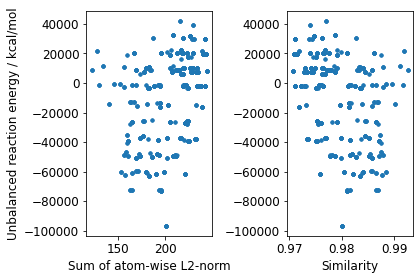

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(slatm_out["ObjValNoPen"]), slatm_out["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Unbalanced reaction energy / kcal/mol")

x = np.exp(-slatm_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, slatm_out["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-amons-cm-global-nonsense-energies.png", dpi=300)
plt.show()